### Project 2 - Random Maze

5×6 Matrix{Bool}:
 1  0  1  1  1  0
 0  1  0  0  1  1
 0  0  0  0  1  0
 0  1  0  1  0  0
 0  0  1  0  1  0

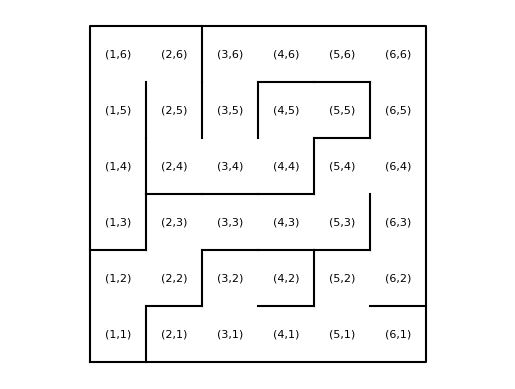

In [47]:
H = Bool[0 1 0 0 0; 1 0 1 0 0; 0 1 1 0 0; 1 1 1 0 1; 0 1 0 1 1; 1 0 0 0 0];
V = Bool[1 0 1 1 1 0; 0 1 0 0 1 1; 0 0 0 0 1 0; 0 1 0 1 0 0; 0 0 1 0 1 0];
using PyPlot, Random
Random.seed!(123)
function plot_maze(H,V)
    clf()
    axis("off")
    axis("equal")
    n = size(H,1)
    plot([0,n,n,0,0], [0,0,n,n,0], color="k")
    
    for x = 1:n-1, y = 1:n
        if V[x,y]
            plot([x,x], [y-1,y], color="k")
        end
    end
    for x = 1:n, y = 1:n-1
        if H[x,y]
            plot([x-1,x], [y,y], color="k")
        end
    end
end

function plot_cell_indices(n)
    for i = 1:n
        for j = 1:n
            text(i-0.5, j-0.5, "($i,$j)",
                horizontalalignment="center",
                verticalalignment="center",
                fontsize=8)
        end
    end
end
plot_maze(H,V)
plot_cell_indices(size(H,1))
display(V)

#=
x = [6, 5, 5, 6, 6, 6, 6, 6, 5, 4, 3, 3, 3, 2, 2, 2, 1];
y = [1, 1, 2, 2, 3, 4, 5, 6, 6, 6, 6, 5, 4, 4, 5, 6, 6];
plot_maze(H,V);
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);
=#

#### Problem 1 - Generate random maze

In [202]:
#Random.seed!(123)
function make_maze(n)
    H = trues(n,n-1)
    V = trues(n-1,n)
    visit = falses(n,n)

    function dig(x,y)
        visit[x,y] = true
        directions = [[1, 0], [-1, 0], [0, 1], [0, -1]]
        shuffle!(directions)
        for d in directions
            x1 = x + d[1]
            y1 = y + d[2]
            if (1 <= x1 <= n)&&(1 <= y1 <= n)&&(!visit[x1,y1])
                if d[1] == 1 #down
                    #println("now at (",x,",",y,")",", go down to (",x1,",",y1,")")
                    V[x,y] = false
                    dig(x1,y1)
                elseif d[1] == -1 #up
                    #println("now at (",x,",",y,")",", go up to (",x1,",",y1,")")
                    V[x1,y1] = false
                    dig(x1,y1)
                elseif d[2] == 1 #right
                    #println("now at (",x,",",y,")",", go right to (",x1,",",y1,")")
                    H[x,y] = false
                    dig(x1,y1)
                elseif d[2] == -1#left
                    #println("now at (",x,",",y,")",", go left to (",x1,",",y1,")")
                    H[x1,y1] = false
                    dig(x1,y1)
                end
            end
        end

    end
    dig(1,1)
    return H,V,visit
end
H,V,m = make_maze(100)


(Bool[0 1 … 0 1; 1 0 … 1 1; … ; 1 0 … 1 0; 0 0 … 0 1], Bool[1 0 … 0 0; 0 1 … 0 0; … ; 0 1 … 1 0; 0 1 … 0 0], Bool[1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1])

#### Problem 2- Find path from (1,n) to (n,1)

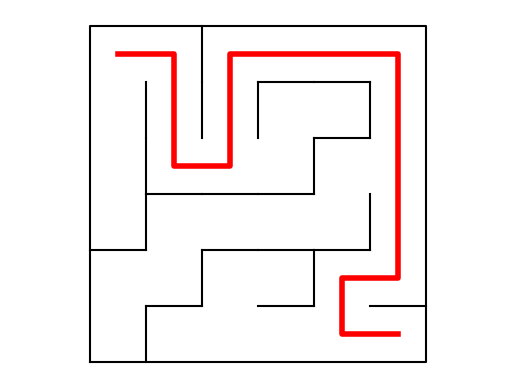

In [203]:
Random.seed!(123)
function find_path(H,V)
    n = size(H,1)
    visit = falses(n,n)
    pathx = []
    pathy = []
    directions = [[1, 0], [-1, 0], [0, 1], [0, -1]] #down, up, right, left
    function recur(x,y)
        visit[x,y] = true
        if (x == n)&&(y == 1)
            visit[x,y] = true
            append!(pathx,x)
            append!(pathy,y)
            return true
        end
        for d in directions
            x1 = x + d[1]
            y1 = y + d[2]
            #println("try go to (",x1,",",y1,")","the direction is ", d)
            if (1 <= x1 <= n)&&(1 <= y1 <= n)&&(!visit[x1,y1])
                if (d[1] == 1)&&(V[x,y]) #down
                    #println("cannot go down")
                    continue
                elseif (d[1] == -1)&&(V[x1,y1]) #up
                    #println("cannot go up")
                    continue
                elseif (d[2] == 1)&&(H[x,y]) #right
                    #println("cannot go right")
                    continue
                elseif (d[2] == -1)&&(H[x1,y1]) #left
                    #println("cannot go left")
                    continue
                end
                if recur(x1,y1)
                    #println("go to (",x,",",y,")")
                    append!(pathx,x)
                    append!(pathy,y)
                    return true
                end
            end
        end
        return false
    end
    recur(1,n)
    return pathx,pathy
end

H = Bool[0 1 0 0 0; 1 0 1 0 0; 0 1 1 0 0; 1 1 1 0 1; 0 1 0 1 1; 1 0 0 0 0];
V = Bool[1 0 1 1 1 0; 0 1 0 0 1 1; 0 0 0 0 1 0; 0 1 0 1 0 0; 0 0 1 0 1 0];
x,y = find_path(H,V)
plot_maze(H,V);
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);

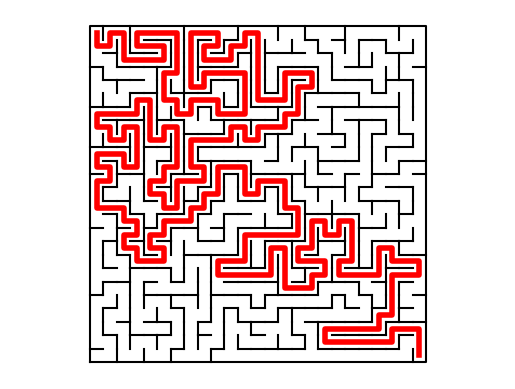

In [204]:
Random.seed!(12345)
n = 25
H,V = make_maze(n)
plot_maze(H,V)
x, y = find_path(H,V)
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);